In [1]:
import os
os.chdir('/Users/adityapatel/personal/projects/git/clash/')

In [2]:
import pymysql
import pymysql.cursors
import config
import pandas as pd
import seaborn as sns

In [3]:
import sqlalchemy

In [4]:
import matplotlib.pylab as plt

In [5]:
from app.compute.player_stats import PlayerStats

In [6]:
%matplotlib inline

In [7]:
sns.set()

In [8]:
connection = pymysql.connect(host=config._mysql_host,
                             user=config._mysql_user,
                             password=config._mysql_password,
                             db=config._mysql_db,
                             port=config._mysql_port,
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

In [9]:
sql = '''
select * from player_stats_historic
'''

In [10]:
with connection.cursor() as cursor:
    # Create a new record
    cursor.execute(sql)
    results = cursor.fetchall()

In [11]:
df = pd.DataFrame(results)

In [12]:
df.shape

(27287, 23)

In [13]:
unique_members = df['player_tag'].unique()
print("There were {} unique members in the clan".format(len(unique_members)))

There were 312 unique members in the clan


In [14]:
df_names = ['tobias']

In [32]:
df_top = df[df['player_name']=='Tobias']

In [33]:
# df_top = df[df['player_name'].isin(df_names)]

In [34]:
df_top['player_name'].unique()

array(['Tobias'], dtype=object)

In [49]:
for_aiur = df[df['clan_tag'] == '#YUPCJJCR']

In [51]:
len(for_aiur['player_name'].unique())

50

In [109]:
frames = []
metric = 'achv_gold_looted'

df_top = for_aiur.copy(deep=True)

for player_name in df_top['player_name'].unique():
    
    df_player = df_top[df_top['player_name'] == player_name]
    
    df_player = df_player[~df_player[metric].isna()]
    
    first_ts = df_player['created_time'].min()
    min_metric = df_player.loc[df_player['created_time'] == first_ts][metric]
    
    df_player[metric] = df_player[metric] - int(min_metric)
    
    frames.append(df_player)

In [110]:
elix_df = pd.concat(frames)

In [112]:
elix_df_grouped = elix_df.groupby('player_name').agg({metric: 'mean', 'created_time':'min'}).reset_index()

In [113]:
elix_df_grouped[elix_df_grouped[metric] == 0].reset_index(drop=True)

,player_name,achv_gold_looted,created_time
0,*(paul.67,0.0,2019-04-09 14:03:07
1,AlvinMd,0.0,2019-04-09 14:03:07
2,Jacob,0.0,2019-04-09 14:03:04
3,MonsterKart,0.0,2019-04-09 14:03:04
4,Tobias,0.0,2019-04-09 14:03:11
5,Tragiic Payday,0.0,2019-04-09 14:03:05
6,morrison,0.0,2019-04-09 14:03:06
7,twintowers2,0.0,2019-04-09 14:03:04
8,yo yo zaid rock,0.0,2019-04-09 14:03:09


In [124]:
elix_df.groupby('player_name').agg({metric: 'max', 
                                   'created_time':'min'}).reset_index().sort_values(metric, ascending=False)

,player_name,achv_gold_looted,created_time
2,BRADY,18264055.0,2019-04-09 14:03:03
8,Fire attack2000,14076929.0,2019-04-09 14:03:04
30,Swedish Sailor,10857345.0,2019-04-09 14:03:06
40,dana,9653801.0,2019-04-09 14:03:06
15,MM,8848281.0,2019-04-09 14:03:07
35,Troop Donator,6656055.0,2019-04-09 14:03:07
12,J.K,5064966.0,2019-04-09 14:03:08
38,adi,4685549.0,2019-04-09 14:03:05
41,david,4575767.0,2019-04-09 14:03:05
16,MR-G,4245460.0,2019-04-09 14:03:09


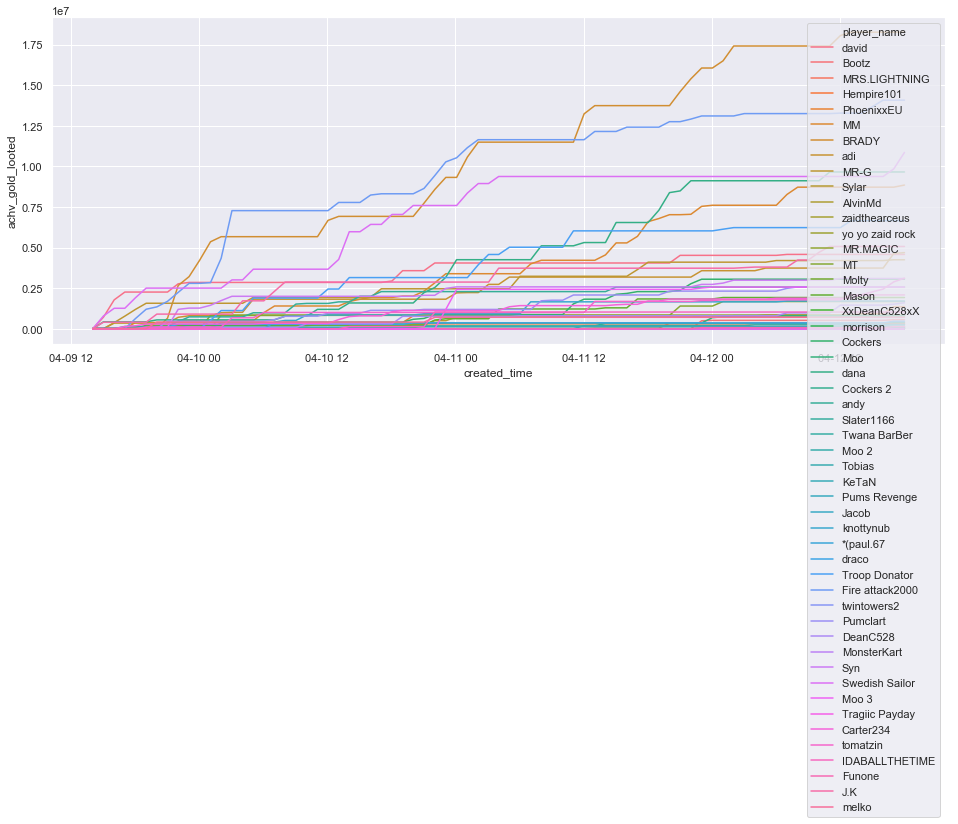

In [114]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='created_time', y=metric, data=elix_df, hue='player_name')

In [39]:
from app.models import PlayerStatsHistoric

In [ ]:
import pymysql
import pymysql.cursors
import config
import pandas as pd
import seaborn as sns

import sqlalchemy

import matplotlib.pylab as plt

from app.compute.player_stats import PlayerStats

%matplotlib inline

sns.set()



connection = pymysql.connect(host=config._mysql_host,
                             user=config._mysql_user,
                             password=config._mysql_password,
                             db=config._mysql_db,
                             port=config._mysql_port,
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

sql = '''
select * from player_stats_historic
'''

with connection.cursor() as cursor:
    # Create a new record
    cursor.execute(sql)
    results = cursor.fetchall()

df = pd.DataFrame(results)